Pre-Works

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
rand_state = 1000

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# 1.Import PCA/Define Model

In [ ]:
# Define feature space X (exclude CustomerID(ID-number) and Gender(categorical data type))
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Define PCA model with 3 components AKA PC1, PC2, PC3
pca = PCA(n_components=3, random_state=rand_state)

# 2.Fit Model & Report PC loadings/Scores

In [ ]:
# Fit the model and get loadings and scores
pca_fit = pca.fit(X)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2', 'PC3'],
    index=X.columns
)
scores = pca.transform(X)

# print statements
print("PC Loadings:")
print(loadings)
print("\nFirst few PC Scores:")
print(pd.DataFrame(scores, columns=['PC1', 'PC2', 'PC3']).head())

PC Loadings:
                             PC1       PC2       PC3
Age                    -0.188974  0.130965  0.973210
Annual Income (k$)      0.588641  0.808376  0.005517
Spending Score (1-100)  0.785997 -0.573914  0.229854

First few PC Scores:
         PC1        PC2        PC3
0 -31.870508 -33.001425 -22.143910
1   0.763397 -56.843865 -10.543638
2 -57.408726 -13.122936 -28.750354
3  -2.169896 -53.477905  -9.511117
4 -32.174920 -30.387005 -10.224508


# 3.Report Cumulalative PVE

In [ ]:
# Calculate cumulative PVE
pve = pca.explained_variance_ratio_
cumulative_pve = np.cumsum(pve)

# print statement
print("\nCumulative PVE (Proportion Variance Explained):")
for i, cum_var in enumerate(cumulative_pve, 1):
    print(f"PC{i}: {cum_var:.4f}")


Cumulative PVE (Proportion Variance Explained):
PC1: 0.4513
PC2: 0.8922
PC3: 1.0000


# 4.Scree Plot

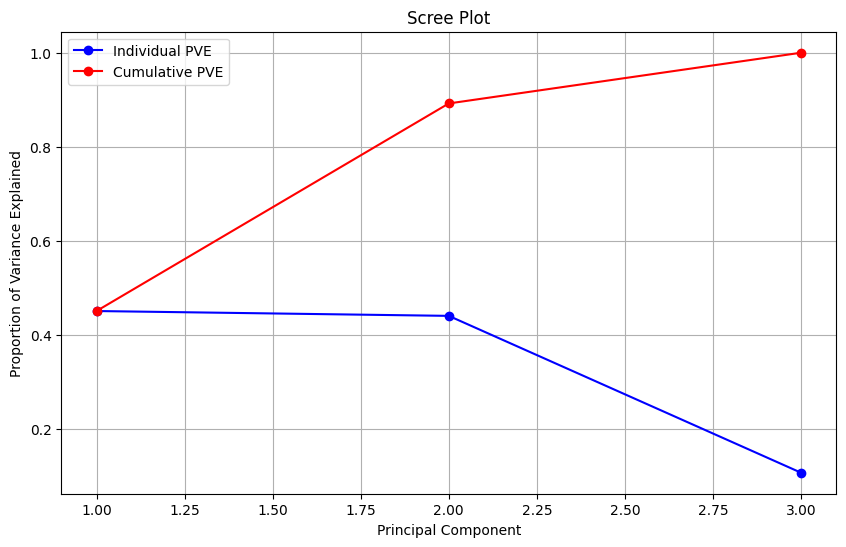

In [ ]:
# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 4), pve, 'bo-')
plt.plot(range(1, 4), cumulative_pve, 'ro-')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.legend(['Individual PVE', 'Cumulative PVE'])
plt.grid(True)
plt.show()

The Individual PVE (blue line):

The first, PC1, explains about 45-ish% of the total variance. The Second, PC2, explains about the same percentage, 45-ish%, as the first, PC1. The third, PC3, explains a little less that 1% of the total variance.

The Cumalative PVE (red line):

The first, PC1, explains about 45-ish%. The first, PC1, and second, PC2, together explain 90-ish% of the variance. All three PC#, PC1, PC2, PC3, together explain 100% of the variance.

Mall management can focus on the two main factors driving customer behavior
They don't need to consider the third component as much when making strategic decisions.This makes their customer segmentation strategy more manageable and actionable

# 5.Biplot

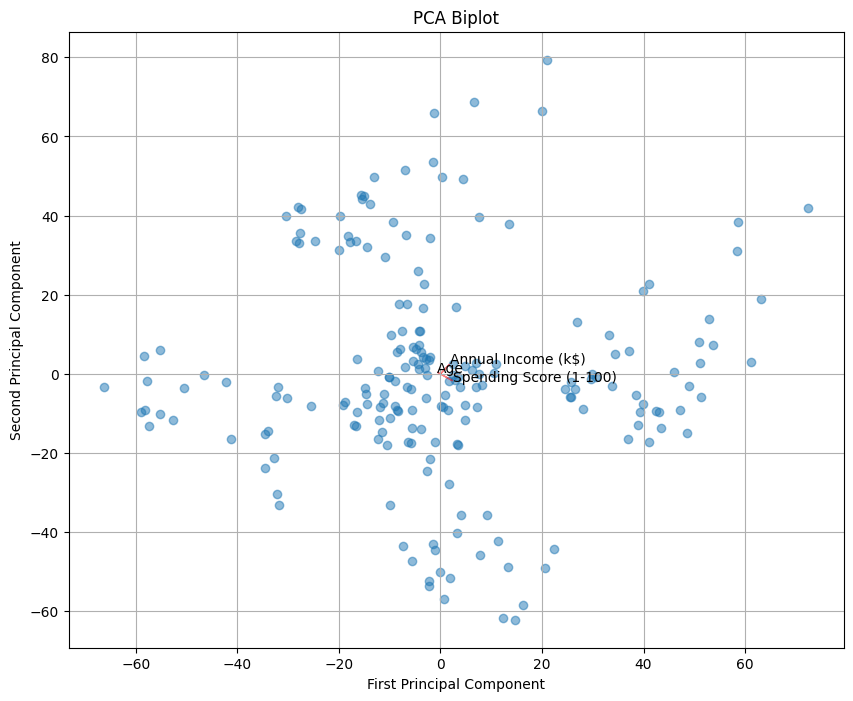

In [ ]:
# Biplot with two features
plt.figure(figsize=(10, 8))
plt.scatter(scores[:, 0], scores[:, 1], alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Biplot')

# Add feature vectors
for i, feature in enumerate(X.columns):
    plt.arrow(0, 0,
              loadings.iloc[i, 0] * 3,
              loadings.iloc[i, 1] * 3,
              color='r', alpha=0.5)
    plt.text(loadings.iloc[i, 0] * 3.2,
             loadings.iloc[i, 1] * 3.2,
             feature)

plt.grid(True)
plt.show()

The vectors appear to be at almost right angles to each other, indicating these features are nearly uncorrelated. Both vectors are relatively short compared to the spread of the data points.

Customer Distribution:
Customers are spread out across all four quadrants
There appears to be significant clustering:
Upper region (positive PC2): Customers with higher spending relative to income
Lower region (negative PC2): Customers with lower spending relative to income
Right region (positive PC1): Higher income customers
Left region (negative PC1): Lower income customers

Pattern Analysis:
Points spread widely along both PC1 (x-axis) and PC2 (y-axis)
Range approximately:
PC1: -75 to +100 (indicating wide income variation)
PC2: -60 to +80 (indicating wide spending behavior variation)
Dense clustering near the center (0,0) suggests many "average" customers
Outliers visible in all directions, particularly in the upper and lower regions


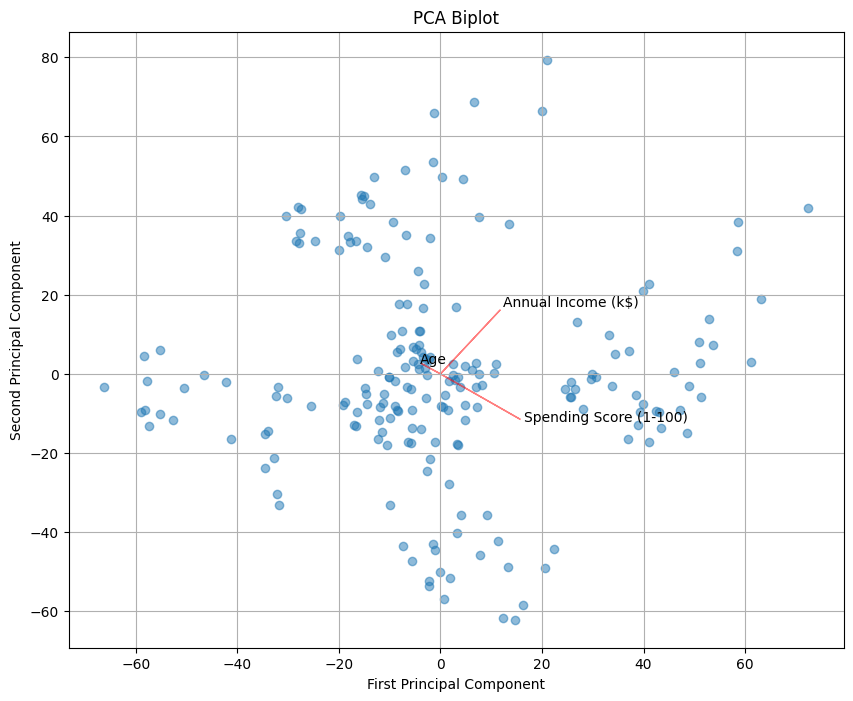


Loadings (showing why vectors need scaling):
                          PC1    PC2
Age                    -0.189  0.131
Annual Income (k$)      0.589  0.808
Spending Score (1-100)  0.786 -0.574


In [ ]:
# Biplot w/ two features zoomed in
plt.figure(figsize=(10, 8))
plt.scatter(scores[:, 0], scores[:, 1], alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Biplot')

# Add feature vectors with longer arrows (multiplying by 20 instead of 3)
for i, feature in enumerate(X.columns):
    plt.arrow(0, 0,
              loadings.iloc[i, 0] * 20,  # Changed from 3 to 20
              loadings.iloc[i, 1] * 20,  # Changed from 3 to 20
              color='r', alpha=0.5)
    plt.text(loadings.iloc[i, 0] * 21,   # Changed from 3.2 to 21
             loadings.iloc[i, 1] * 21,    # Changed from 3.2 to 21
             feature)

plt.grid(True)
plt.show()

# Print the loadings to see the actual values
print("\nLoadings (showing why vectors need scaling):")
print(loadings[['PC1', 'PC2']].round(3))

# 6.Number of Recommend Customer Segments

Rationale for 5 clusters:
The data points show clear natural groupings in these 5 areas
Each cluster represents a distinct customer profile with unique characteristics
This segmentation is detailed enough to be actionable but not so complex that it becomes unmanageable.
The central cluster (average customers) is important to recognize as its own segment, rather than forcing these customers into the corner quadrants
This segmentation allows for targeted marketing strategies and store placement decisions that can cater to each group's specific behaviors and needs

This 5-segment approach would allow the mall management to:
Optimize store mix for each segment
Develop targeted marketing campaigns
Plan promotions and events for specific segments
Make informed decisions about mall layout and amenities

This biplot suggests the mall has a diverse customer base with distinct spending patterns that aren't solely determined by income level. The perpendicular relationship between Annual Income and Spending Score vectors confirms that spending behavior is largely independent of income level, which is valuable information for the mall's marketing and merchandising strategies.
